video link:
https://www.youtube.com/watch?v=cDinuQP9kMI

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


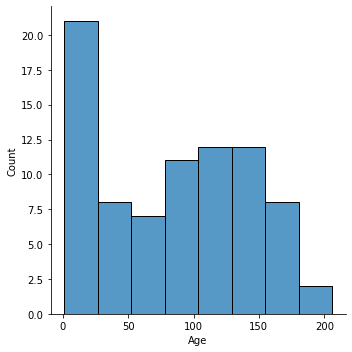

In [5]:
sns.displot(x=df['Age'])

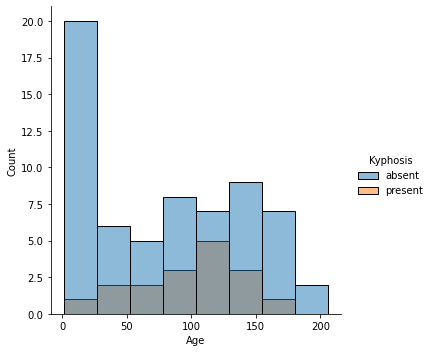

In [6]:
#sns.displot(x=df['Age'],hue=df['Kyphosis'])
sns.displot(x=df['Age'],hue=df['Kyphosis'])

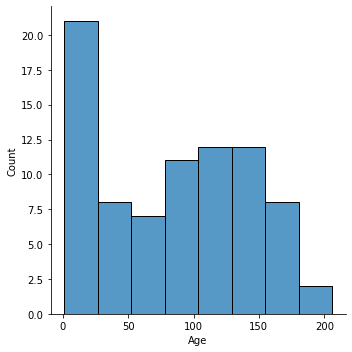

In [7]:
sns.displot(x=df['Age'])


In [8]:
present=df[df['Kyphosis']=='present']


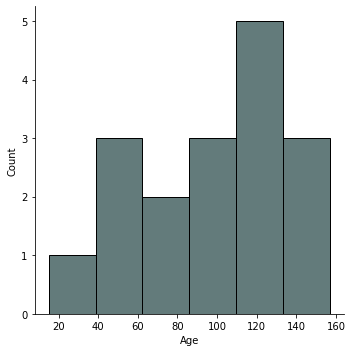

In [9]:
sns.displot(present['Age'],color='DarkSlateGrey')


In [10]:
absent=df[df['Kyphosis']=='absent']


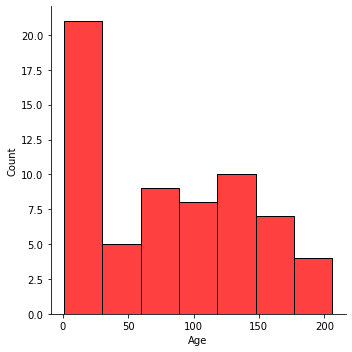

In [11]:
sns.displot(absent['Age'],bins=7,color='red')


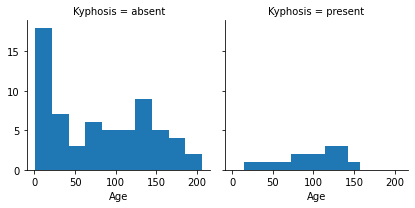

In [12]:
g = sns.FacetGrid(data=df,col='Kyphosis')
g.map(plt.hist,'Age')

## Train Test Split
Let's split up the data into a training set and a test set!

In [13]:
from sklearn.model_selection import train_test_split


In [15]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


## Decision Trees
We'll start just by training a single decision tree.

In [17]:
from sklearn.tree import DecisionTreeClassifier


In [18]:
dtree = DecisionTreeClassifier()


In [19]:
dtree.fit(X_train,y_train)


DecisionTreeClassifier()

## Prediction and Evaluation
Let's evaluate our decision tree.

In [22]:
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix


In [24]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

      absent       0.64      0.88      0.74        16
     present       0.33      0.11      0.17         9

    accuracy                           0.60        25
   macro avg       0.48      0.49      0.45        25
weighted avg       0.53      0.60      0.53        25



In [26]:
len(y_test)


25

In [27]:
sum(y_test=='absent')


16

In [28]:
sum(y_test=='present')


9

## Random Forests
Now let's compare the decision tree model to a random forest.

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
rfc_pred = rfc.predict(X_test)


In [31]:
print(confusion_matrix(y_test,rfc_pred))


[[16  0]
 [ 9  0]]


In [32]:
print(classification_report(y_test,rfc_pred))


              precision    recall  f1-score   support

      absent       0.64      1.00      0.78        16
     present       0.00      0.00      0.00         9

    accuracy                           0.64        25
   macro avg       0.32      0.50      0.39        25
weighted avg       0.41      0.64      0.50        25



C:\Users\EmPart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EmPart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EmPart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression model
Now let's compare the decision tree model and random forest to Logistic Regression model.

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [36]:
predictions = logmodel.predict(X_test)


In [37]:
confusion_matrix(y_test,predictions)


array([[16,  0],
       [ 9,  0]], dtype=int64)

In [38]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

      absent       0.64      1.00      0.78        16
     present       0.00      0.00      0.00         9

    accuracy                           0.64        25
   macro avg       0.32      0.50      0.39        25
weighted avg       0.41      0.64      0.50        25



C:\Users\EmPart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EmPart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EmPart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 ### Great Job!